<a href="https://colab.research.google.com/github/jajapuramshivasai/Advanced-Experimental-Techniques-in-Quantum-Materials/blob/main/VanderPauw_Germanium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

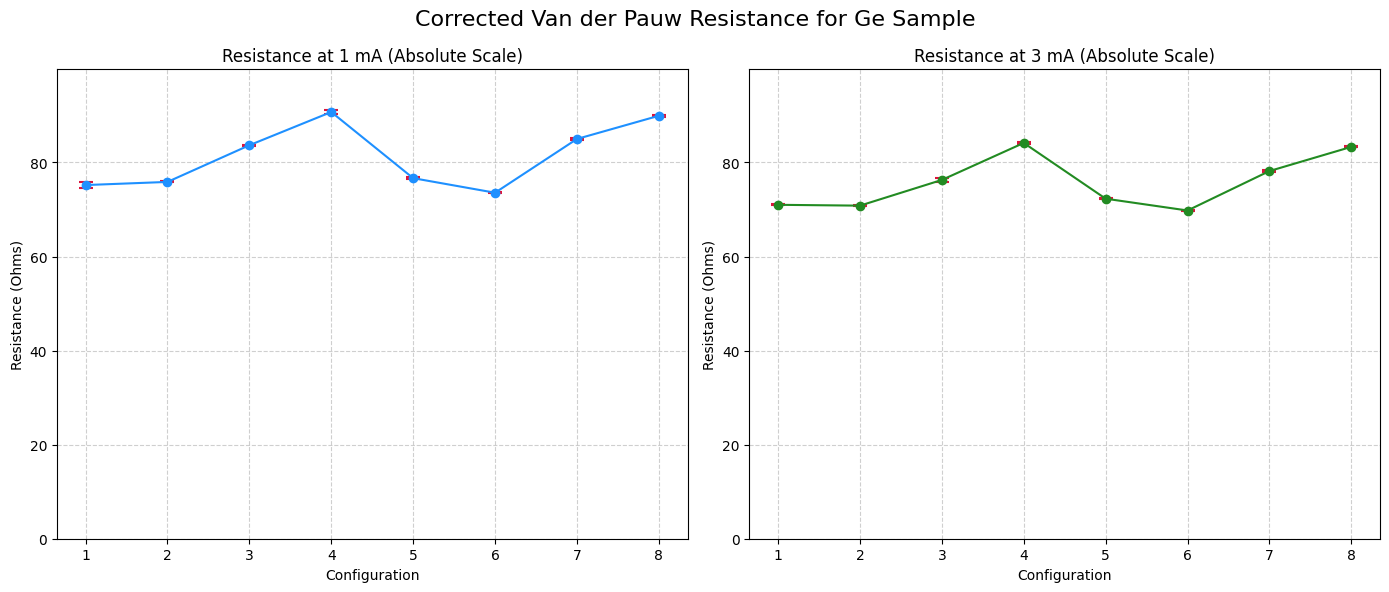

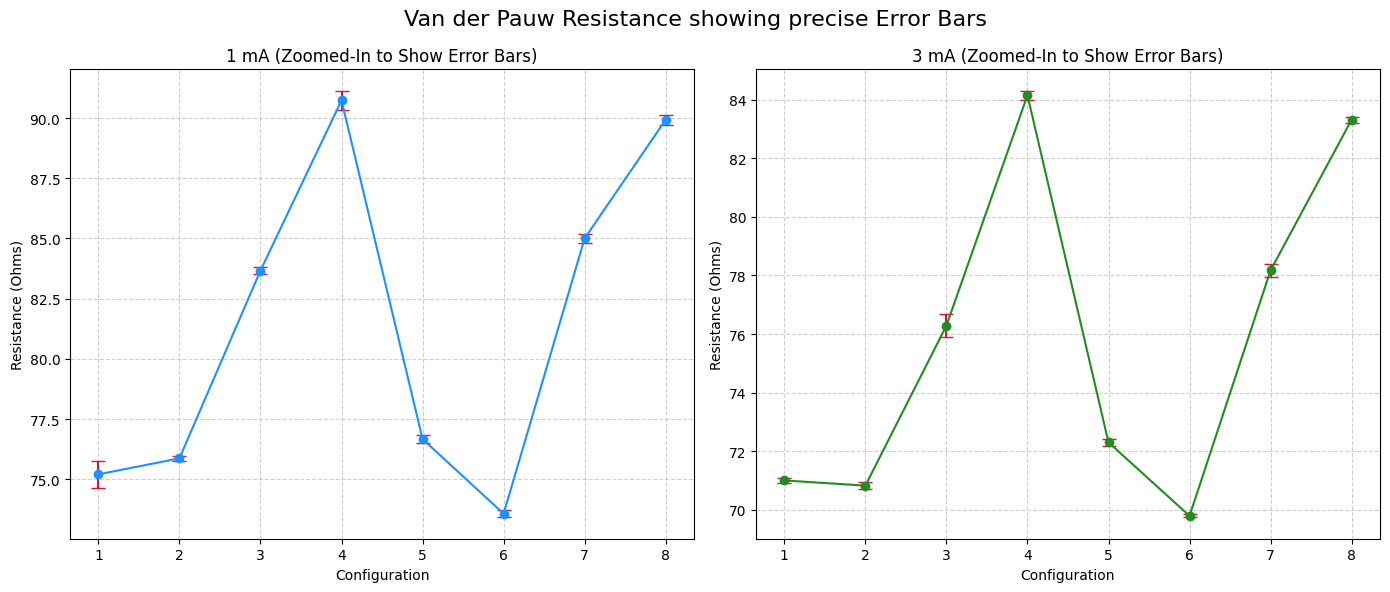

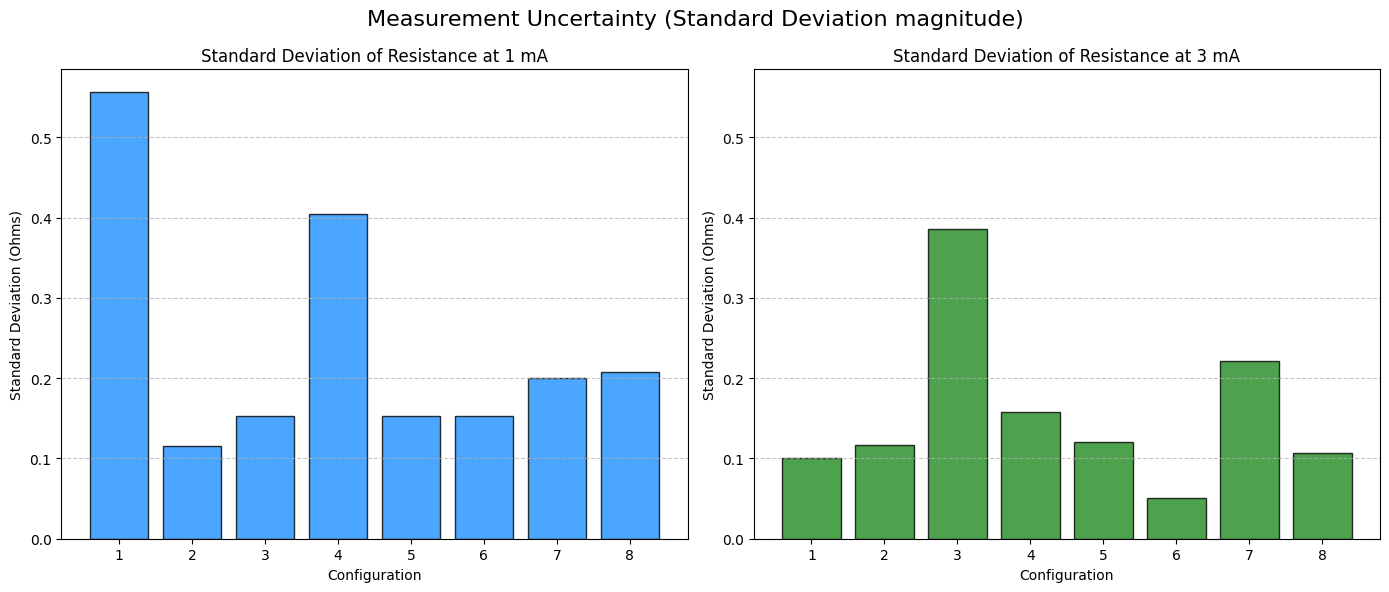

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# ==========================================
# 1. DATA INPUT & PROCESSING
# ==========================================

# Raw voltage measurements as recorded in lab notes
data_1mA_raw = np.array([
    [0.747, 0.751, 0.758],
    [0.758, 0.760, 0.758],
    [0.837, 0.838, 0.835],
    [0.903, 0.908, 0.911],
    [0.765, 0.767, 0.768],
    [0.734, 0.736, 0.737],
    [0.848, 0.850, 0.852],
    [0.897, 0.900, 0.901]
])

data_3mA_raw = np.array([
    [2.127, 2.130, 2.133],
    [2.121, 2.125, 2.128],
    [2.278, 2.287, 2.301],
    [2.523, 2.521, 2.530],
    [2.165, 2.170, 2.172],
    [2.094, 2.095, 2.092],
    [2.341, 2.342, 2.353],
    [2.502, 2.496, 2.501]
])

# Apply 10^-1 multiplier deduced from the standard Ge sample
volt_1mA = data_1mA_raw * 0.1
volt_3mA = data_3mA_raw * 0.1

# Convert Voltage to Resistance (R = V/I)
res_1mA = volt_1mA / 0.001  # I = 1 mA = 0.001 A
res_3mA = volt_3mA / 0.003  # I = 3 mA = 0.003 A

# Calculate means and standard deviations
mean_R_1mA = np.mean(res_1mA, axis=1)
std_R_1mA = np.std(res_1mA, axis=1, ddof=1)

mean_R_3mA = np.mean(res_3mA, axis=1)
std_R_3mA = np.std(res_3mA, axis=1, ddof=1)


# ==========================================
# 2. VAN DER PAUW CALCULATIONS
# ==========================================

# Groupings based on typical VdP symmetry (Vertical vs Horizontal)
# Configs 1, 2, 5, 6 form RA; Configs 3, 4, 7, 8 form RB
RA_1mA = np.mean([mean_R_1mA[0], mean_R_1mA[1], mean_R_1mA[4], mean_R_1mA[5]])
RB_1mA = np.mean([mean_R_1mA[2], mean_R_1mA[3], mean_R_1mA[6], mean_R_1mA[7]])

RA_3mA = np.mean([mean_R_3mA[0], mean_R_3mA[1], mean_R_3mA[4], mean_R_3mA[5]])
RB_3mA = np.mean([mean_R_3mA[2], mean_R_3mA[3], mean_R_3mA[6], mean_R_3mA[7]])

# Van der Pauw Equation: exp(-pi*RA/Rs) + exp(-pi*RB/Rs) = 1
def vdp_eq(Rs, RA, RB):
    return np.exp(-np.pi * RA / Rs) + np.exp(-np.pi * RB / Rs) - 1.0

# Initial guess using the simplified formula for roughly symmetric samples
Rs_guess_1mA = np.pi * (RA_1mA + RB_1mA) / (2 * np.log(2))
Rs_1mA = fsolve(vdp_eq, Rs_guess_1mA, args=(RA_1mA, RB_1mA))[0]

Rs_guess_3mA = np.pi * (RA_3mA + RB_3mA) / (2 * np.log(2))
Rs_3mA = fsolve(vdp_eq, Rs_guess_3mA, args=(RA_3mA, RB_3mA))[0]

# Calculate Resistivity (rho = Rs * d)
d_cm = 0.5 / 10.0  # Thickness: 0.5 mm converted to cm

rho_1mA = Rs_1mA * d_cm
rho_3mA = Rs_3mA * d_cm

# print("--- RESULTS AT 1 mA ---")
# print(f"RA Average: {RA_1mA:.2f} Ohms | RB Average: {RB_1mA:.2f} Ohms")
# print(f"Sheet Resistance (Rs): {Rs_1mA:.2f} Ohms/sq")
# print(f"Resistivity (rho): {rho_1mA:.2f} Ohm-cm\n")

# print("--- RESULTS AT 3 mA ---")
# print(f"RA Average: {RA_3mA:.2f} Ohms | RB Average: {RB_3mA:.2f} Ohms")
# print(f"Sheet Resistance (Rs): {Rs_3mA:.2f} Ohms/sq")
# print(f"Resistivity (rho): {rho_3mA:.2f} Ohm-cm\n")


# ==========================================
# 3. PLOTTING
# ==========================================
configs = np.arange(1, 9)

# --- PLOT 1: Absolute Scale Resistance ---
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.errorbar(configs, mean_R_1mA, yerr=std_R_1mA, fmt='-o', capsize=5, capthick=1.5, color='dodgerblue', ecolor='crimson')
ax1.set(title='Resistance at 1 mA (Absolute Scale)', xlabel='Configuration', ylabel='Resistance (Ohms)', ylim=(0, max(mean_R_1mA)*1.1))
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.errorbar(configs, mean_R_3mA, yerr=std_R_3mA, fmt='-o', capsize=5, capthick=1.5, color='forestgreen', ecolor='crimson')
ax2.set(title='Resistance at 3 mA (Absolute Scale)', xlabel='Configuration', ylabel='Resistance (Ohms)', ylim=(0, max(mean_R_1mA)*1.1)) # Shared Y-axis
ax2.grid(True, linestyle='--', alpha=0.6)
fig1.suptitle('Corrected Van der Pauw Resistance for Ge Sample', fontsize=16)
plt.tight_layout()


# --- PLOT 2: Zoomed-in Resistance (Visible Error Bars) ---
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))
ax3.errorbar(configs, mean_R_1mA, yerr=std_R_1mA, fmt='o', capsize=5, color='dodgerblue', ecolor='crimson', linestyle='-')
ax3.set(title='1 mA (Zoomed-In to Show Error Bars)', xlabel='Configuration', ylabel='Resistance (Ohms)')
ax3.grid(True, linestyle='--', alpha=0.6)

ax4.errorbar(configs, mean_R_3mA, yerr=std_R_3mA, fmt='o', capsize=5, color='forestgreen', ecolor='crimson', linestyle='-')
ax4.set(title='3 mA (Zoomed-In to Show Error Bars)', xlabel='Configuration', ylabel='Resistance (Ohms)')
ax4.grid(True, linestyle='--', alpha=0.6)
fig2.suptitle('Van der Pauw Resistance showing precise Error Bars', fontsize=16)
plt.tight_layout()


# --- PLOT 3: Standard Deviation Bar Charts ---
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 6))
ax5.bar(configs, std_R_1mA, color='dodgerblue', alpha=0.8, edgecolor='black')
ax5.set(title='Standard Deviation of Resistance at 1 mA', xlabel='Configuration', ylabel='Standard Deviation (Ohms)')
ax5.grid(axis='y', linestyle='--', alpha=0.7)

ax6.bar(configs, std_R_3mA, color='forestgreen', alpha=0.8, edgecolor='black')
ax6.set(title='Standard Deviation of Resistance at 3 mA', xlabel='Configuration', ylabel='Standard Deviation (Ohms)')
ax6.grid(axis='y', linestyle='--', alpha=0.7)

max_y_std = max(ax5.get_ylim()[1], ax6.get_ylim()[1])
ax5.set_ylim(0, max_y_std)
ax6.set_ylim(0, max_y_std)
fig3.suptitle('Measurement Uncertainty (Standard Deviation magnitude)', fontsize=16)
plt.tight_layout()

# Show all plots at once
plt.show()

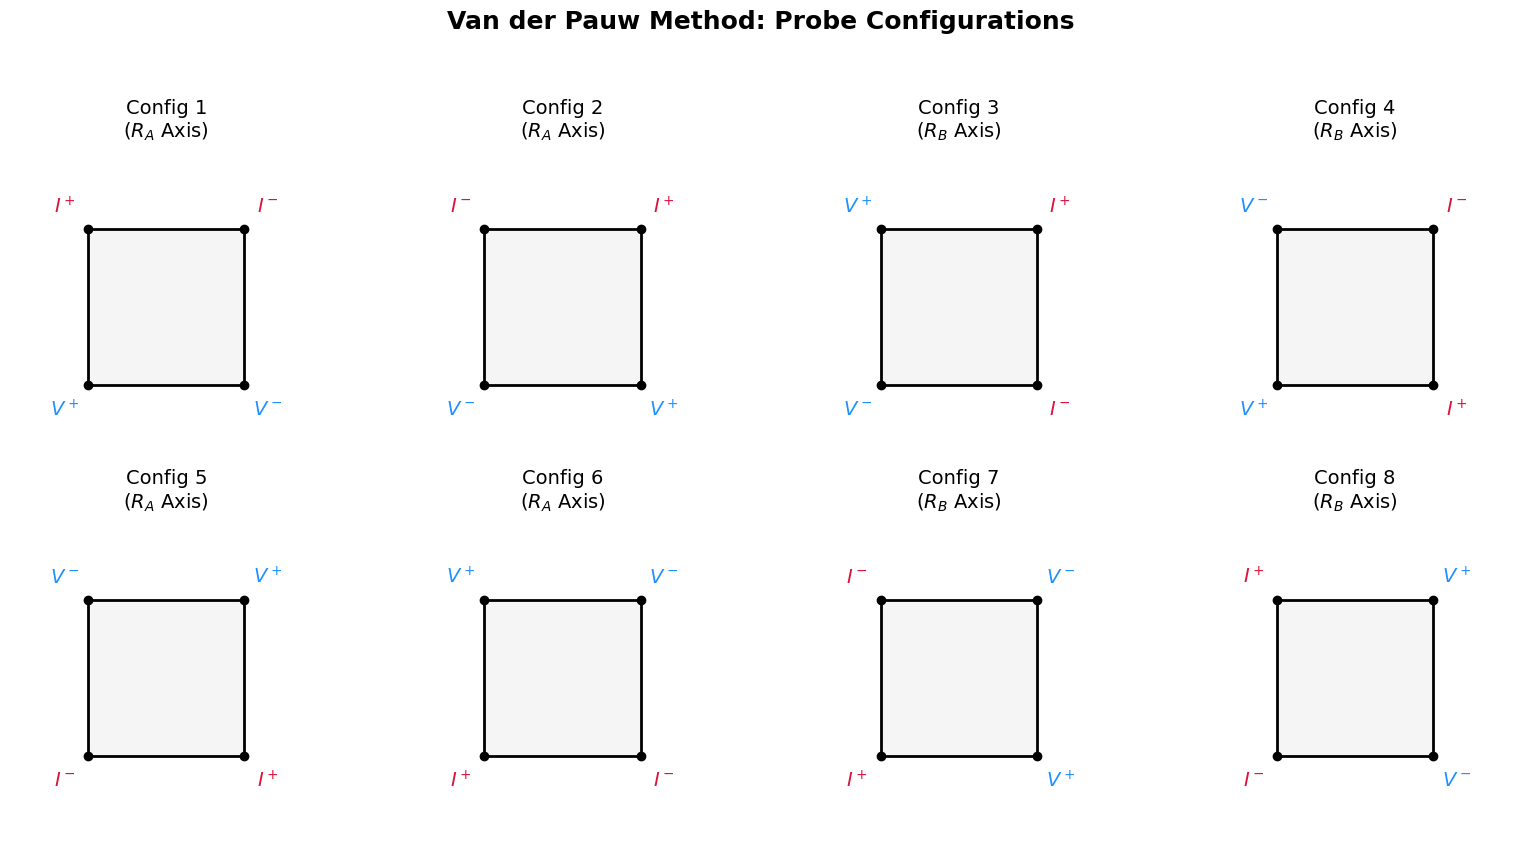

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the 4 corners of the sample
# 1: Top-Left, 2: Top-Right, 3: Bottom-Right, 4: Bottom-Left
corners = {
    1: (-1, 1),
    2: (1, 1),
    3: (1, -1),
    4: (-1, -1)
}

# Offsets for placing text labels so they don't overlap with the sample
offsets = {
    1: (-0.3, 0.3),
    2: (0.3, 0.3),
    3: (0.3, -0.3),
    4: (-0.3, -0.3)
}

# Define the 8 configurations (I_in, I_out, V_pos, V_neg)
# Group A (Horizontal resistance configs: 1, 2, 5, 6)
# Group B (Vertical resistance configs: 3, 4, 7, 8)
configs = {
    1: (1, 2, 4, 3), # I along top, V along bottom
    2: (2, 1, 3, 4), # Reverse of 1
    5: (3, 4, 2, 1), # I along bottom, V along top
    6: (4, 3, 1, 2), # Reverse of 5

    3: (2, 3, 1, 4), # I along right edge, V along left edge
    4: (3, 2, 4, 1), # Reverse of 3
    7: (4, 1, 3, 2), # I along left edge, V along right edge
    8: (1, 4, 2, 3)  # Reverse of 7
}

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Reorder the plotting so it goes 1->8 sequentially
plot_order = [1, 2, 3, 4, 5, 6, 7, 8]

for i, config_num in enumerate(plot_order):
    ax = axes[i]
    I_pos, I_neg, V_pos, V_neg = configs[config_num]

    # Draw the square Ge sample
    rect = patches.Rectangle((-1, -1), 2, 2, linewidth=2, edgecolor='black', facecolor='whitesmoke')
    ax.add_patch(rect)

    # Draw the contact points (small black dots at corners)
    for corner in corners.values():
        ax.plot(corner[0], corner[1], 'ko', markersize=6)

    # Function to add labels
    def add_label(ax, corner_idx, text, color):
        x, y = corners[corner_idx]
        dx, dy = offsets[corner_idx]
        ax.text(x + dx, y + dy, text, fontsize=14, fontweight='bold', color=color,
                ha='center', va='center')

    # Add I+, I-, V+, V- labels
    add_label(ax, I_pos, r'$I^+$', 'crimson')
    add_label(ax, I_neg, r'$I^-$', 'crimson')
    add_label(ax, V_pos, r'$V^+$', 'dodgerblue')
    add_label(ax, V_neg, r'$V^-$', 'dodgerblue')

    # Formatting
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axis('off') # Hide the grid and axes for a clean look

    # Group label for the title
    if config_num in [1, 2, 5, 6]:
        group = r"($R_A$ Axis)"
    else:
        group = r"($R_B$ Axis)"

    ax.set_title(f'Config {config_num}\n{group}', fontsize=14, pad=10)

plt.suptitle('Van der Pauw Method: Probe Configurations', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()

# Save and show
plt.savefig('vdp_probe_configurations.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
from scipy.optimize import fsolve

# ==========================================
# 1. DATA INPUT & PROCESSING
# ==========================================
# Raw voltage measurements (with the 10^-1 multiplier applied directly)
volt_1mA = np.array([
    [0.0747, 0.0751, 0.0758],
    [0.0758, 0.0760, 0.0758],
    [0.0837, 0.0838, 0.0835],
    [0.0903, 0.0908, 0.0911],
    [0.0765, 0.0767, 0.0768],
    [0.0734, 0.0736, 0.0737],
    [0.0848, 0.0850, 0.0852],
    [0.0897, 0.0900, 0.0901]
])

volt_3mA = np.array([
    [0.2127, 0.2130, 0.2133],
    [0.2121, 0.2125, 0.2128],
    [0.2278, 0.2287, 0.2301],
    [0.2523, 0.2521, 0.2530],
    [0.2165, 0.2170, 0.2172],
    [0.2094, 0.2095, 0.2092],
    [0.2341, 0.2342, 0.2353],
    [0.2502, 0.2496, 0.2501]
])

# Convert Voltage to Resistance (R = V/I)
res_1mA = volt_1mA / 0.001
res_3mA = volt_3mA / 0.003

# Calculate means and Standard Error of the Mean (SEM = std / sqrt(N))
# N = 3 readings per configuration
mean_R_1mA = np.mean(res_1mA, axis=1)
sem_R_1mA = np.std(res_1mA, axis=1, ddof=1) / np.sqrt(3)

mean_R_3mA = np.mean(res_3mA, axis=1)
sem_R_3mA = np.std(res_3mA, axis=1, ddof=1) / np.sqrt(3)

# ==========================================
# 2. VAN DER PAUW FUNCTIONS
# ==========================================
def vdp_eq(Rs, RA, RB):
    return np.exp(-np.pi * RA / Rs) + np.exp(-np.pi * RB / Rs) - 1.0

def calculate_Rs(RA, RB):
    # Initial guess
    Rs_guess = np.pi * (RA + RB) / (2 * np.log(2))
    # Solve for Rs
    Rs_sol = fsolve(vdp_eq, Rs_guess, args=(RA, RB))[0]
    return Rs_sol

# ==========================================
# 3. ERROR PROPAGATION & CALCULATION
# ==========================================
d_cm = 0.05 # Thickness in cm

def process_data(mean_R, sem_R, current_label):
    # Group configurations for RA (1, 2, 5, 6) and RB (3, 4, 7, 8)
    # Note: Python uses 0-based indexing, so Config 1 is index 0
    idx_A = [0, 1, 4, 5]
    idx_B = [2, 3, 6, 7]

    # Calculate RA and RB means
    RA = np.mean(mean_R[idx_A])
    RB = np.mean(mean_R[idx_B])

    # Propagate error for RA and RB averages
    # Error of an average = (1/N) * sqrt(sum(errors^2))
    err_RA = 0.25 * np.sqrt(np.sum(sem_R[idx_A]**2))
    err_RB = 0.25 * np.sqrt(np.sum(sem_R[idx_B]**2))

    # Calculate Base Sheet Resistance
    Rs = calculate_Rs(RA, RB)

    # Numerical derivative to propagate error through the VdP equation
    # dRs/dRA approx = (Rs(RA + h, RB) - Rs(RA, RB)) / h
    h = 1e-5
    dRs_dRA = (calculate_Rs(RA + h, RB) - Rs) / h
    dRs_dRB = (calculate_Rs(RA, RB + h) - Rs) / h

    # Calculate final error in Sheet Resistance
    err_Rs = np.sqrt((dRs_dRA * err_RA)**2 + (dRs_dRB * err_RB)**2)

    # Calculate Resistivity and its error
    rho = Rs * d_cm
    err_rho = err_Rs * d_cm

    # Print formatted output
    print(f"--- RESULTS AT {current_label} ---")
    print(f"RA = {RA:.3f} ± {err_RA:.3f} Ohms")
    print(f"RB = {RB:.3f} ± {err_RB:.3f} Ohms")
    print(f"Sheet Resistance (Rs) = {Rs:.3f} ± {err_Rs:.3f} Ohms/sq")
    print(f"Resistivity (rho)     = {rho:.4f} ± {err_rho:.4f} Ohm-cm\n")

# Run calculations
process_data(mean_R_1mA, sem_R_1mA, "1 mA")
process_data(mean_R_3mA, sem_R_3mA, "3 mA")

--- RESULTS AT 1 mA ---
RA = 75.325 ± 0.088 Ohms
RB = 87.333 ± 0.075 Ohms
Sheet Resistance (Rs) = 367.916 ± 0.265 Ohms/sq
Resistivity (rho)     = 18.3958 ± 0.0132 Ohm-cm

--- RESULTS AT 3 mA ---
RA = 70.978 ± 0.029 Ohms
RB = 80.486 ± 0.070 Ohms
Sheet Resistance (Rs) = 342.775 ± 0.167 Ohms/sq
Resistivity (rho)     = 17.1388 ± 0.0083 Ohm-cm

